# Basic Exploratory Data Analysis on Unicorn Companies

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load and read the dataset
df = pd.read_csv(r"C:\Users\fadekemi adefemi\Documents\Data Analytics\python docs\Unicorn_Companies.csv")
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
#check for the first five rows
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
#check for the last five rows
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [5]:
#shape of the data
df.shape

(1074, 10)

In [6]:
#check the columns
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [7]:
#check the data types of the columns
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [8]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [9]:
# check for missing values 
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [10]:
# Define a function to convert M and B to millions and billions respectively
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1]) * 1e6
    elif x[-1] == 'B':
        return float(x[:-1]) * 1e9
    else:
        return x

# convert the valuation column to float
df['Valuation'] = df['Valuation'].astype(str).str.replace('$','', regex=False).apply(convert_to_number).astype(float)
# convert the funding column to float
df['Funding'] = df['Funding'].astype(str).replace('Unknown','0').str.replace('$','', regex=False).str.replace('M', '000000', regex=False).str.replace('B', '000000000', regex=False).apply(convert_to_number).astype(float)
# print the updated dataFrame
df.head()



,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [11]:
df.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [12]:
# convert the Date Joined to datetime

df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# convert the Year Funded to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format ='%Y') 


In [13]:
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [14]:
# calculate the age of the company at the time it joined the unicorn companies

df['Age of Joining'] = ((df['Date Joined'] - df['Year Founded']). dt.days / 365).round(1)

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [15]:
# Apply the ffill method to the 'CITY' and 'SELECT INVESTORS' columns
df['City']= df['City'].ffill()
df['Select Investors'] = df['Select Investors'].ffill()

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [16]:
# check for missing values 
df.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of Joining      0
dtype: int64

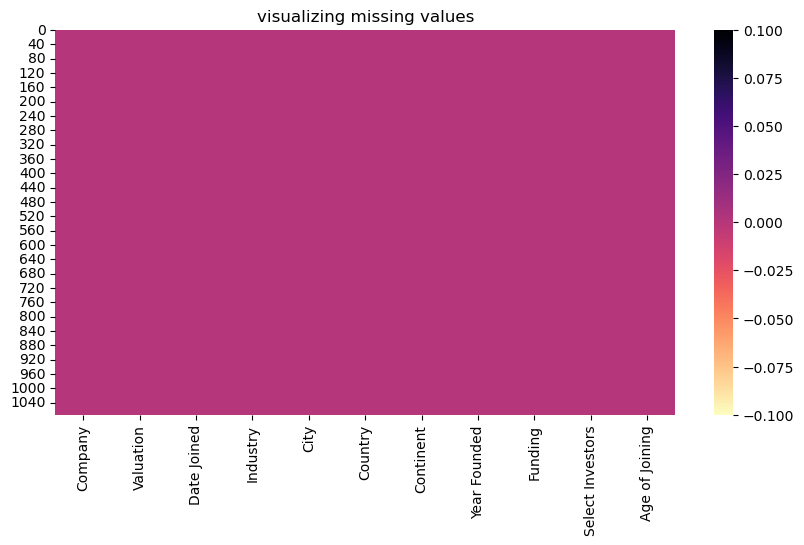

In [17]:
# visualize the missing values
plt.figure(figsize = (10, 5))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

### 1.  Which unicorn companies have had the biggest return on investment?

In [18]:
# Calculate the Return on Investment(ROI) for each company
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']
df['ROI']

0       21.500000
1       13.285714
2       49.000000
3       46.500000
4       10.500000
          ...    
1069     1.638522
1070     0.010101
1071    11.500000
1072     0.262626
1073     0.612903
Name: ROI, Length: 1074, dtype: float64

In [19]:
# Top 10 companies with the most Return on Investment(ROI)
top_10_companies = df.head(10)
top_10_companies

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,ROI
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,21.500000
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,13.285714
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,49.000000
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,46.500000
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,10.500000
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat...",6.0,68.930070
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012-01-01,2.000000e+09,"Tiger Global Management, Insight Partners, DST...",7.3,19.000000
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",3.0,12.000000
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,1.400000e+10,Tiger Global Management,3.0,1.714286
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013-01-01,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates...",6.1,11.666667


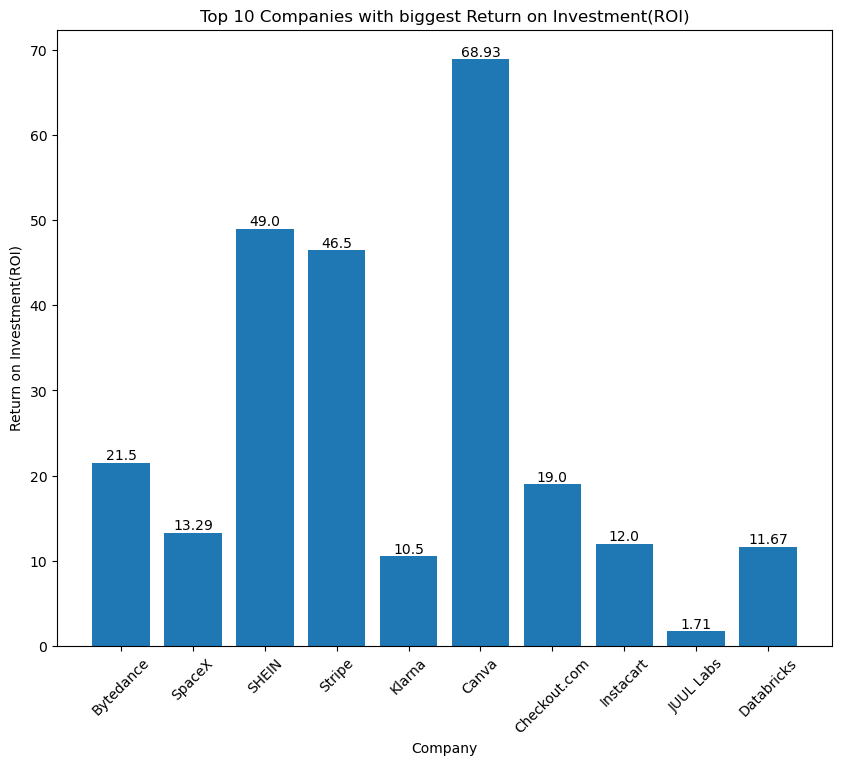

In [20]:
# Create a bar chart to visualize the ROI for the top 5 companies
plt.figure(figsize = (10,8))
plt.bar(top_10_companies['Company'], top_10_companies['ROI'])
for i, val in enumerate(top_10_companies['ROI']):
    plt.text(i, val, str(round(val, 2)), ha='center', va='bottom')

plt.xlabel('Company')
plt.ylabel('Return on Investment(ROI)')
plt.title('Top 10 Companies with biggest Return on Investment(ROI)')
plt.xticks(rotation=45)
plt.show()

# Observation
Canva has the biggest ROI with a value of 68.93, while JUUL Labs has the smallest ROI of 1.71 based on the bar chart above.

### 2. How long does it usually take for a company to become a unicorn? Has it always been this way?

In [21]:


# Calculate the time taken for a company to become a unicorn
df['Time_to_Unicorn'] = df['Valuation'].notnull().astype(int) * (df['Valuation'].notnull().cumsum()) - df['Year Founded'].rank(method='min')


# Calculate the median time taken for a company to become a unicorn
median_time_to_unicorn = df['Time_to_Unicorn'].median()

# Group the data by year and calculate the median time taken for a company to become a unicorn each year
yearly_median_time_to_unicorn = df.groupby(df['Year Founded'].dt.year)['Time_to_Unicorn'].median()
yearly_median_time_to_unicorn

Year Founded
1919     189.0
1979     372.0
1984     697.0
1990     837.0
1991       7.0
1992     372.0
1993    1037.0
1994     116.5
1995     276.5
1996      68.0
1997    1054.0
1998     149.0
1999     595.5
2000     581.0
2001     530.0
2002     292.0
2003     185.5
2004     372.5
2005     435.5
2006     378.0
2007     476.0
2008     255.0
2009     493.0
2010     366.5
2011     339.5
2012     144.0
2013      50.0
2014      87.0
2015     -53.0
2016    -202.5
2017    -315.0
2018    -340.0
2019    -327.0
2020    -279.0
2021    -288.0
Name: Time_to_Unicorn, dtype: float64

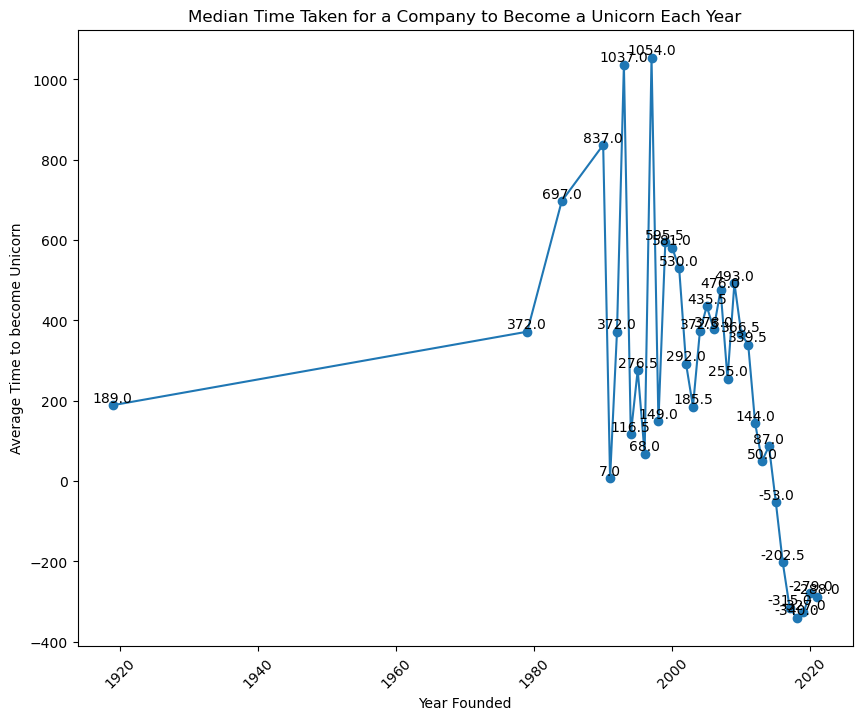

In [22]:
# Create a line plot to visualize the median time taken for a company to become a unicorn each year
plt.figure(figsize = (10,8))
plt.plot(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values, marker='o')
plt.xlabel('Year Founded')
plt.ylabel('Average Time to become Unicorn')
plt.title('Median Time Taken for a Company to Become a Unicorn Each Year')
plt.xticks(rotation=45)
# Add data labels to each data point
for x, y in zip(yearly_median_time_to_unicorn.index, yearly_median_time_to_unicorn.values):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
plt.show()

In [23]:
print(f"The median time taken for a company to become a unicorn is {median_time_to_unicorn:.2f} years.")

The median time taken for a company to become a unicorn is 29.50 years.


### 3. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

In [24]:
# This is to group the dataset by 'Country' and then count the number of unicorns in each country in descending order
country_counts = df['Country'].value_counts().sort_values(ascending=False)
country_counts

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Netherlands               6
Sweden                    6
Mexico                    6
Indonesia                 6
Hong Kong                 6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Chile                     2
Bahamas             

In [25]:
# top 10 countries with the most unicorns
top10_countries = country_counts.head(10)
top10_countries

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

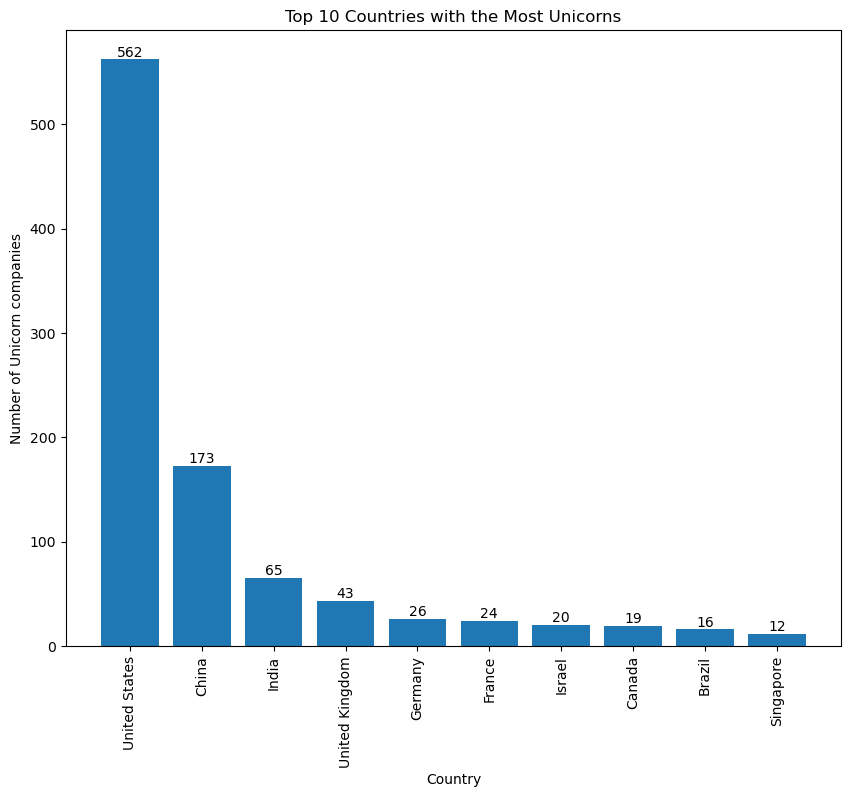

In [26]:
# Plotting the top 10 countries
plt.figure(figsize=(10, 8))
plt.bar(top10_countries.index, top10_countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Unicorn companies')
plt.title('Top 10 Countries with the Most Unicorns')
plt.xticks(rotation=90)
for i, count in enumerate(top10_countries.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Observation
United states has the highest number of Companies with a total of 562

In [27]:
# Group data by city and count the number of unicorn companies in each city
city_counts = df['City'].value_counts()

# Filter cities with a high number of unicorn companies (e.g., top 10 cities)
high_unicorn_cities = city_counts[city_counts >= 10]

# Print the cities that appear to be industry hubs
print("Cities that appear to be industry hubs:")
print(high_unicorn_cities)

Cities that appear to be industry hubs:
San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
Bengaluru         29
Shenzhen          20
Paris             19
Palo Alto         18
Berlin            18
Hangzhou          16
Boston            16
Chicago           16
Mountain View     16
Sao Paulo         12
Tel Aviv          11
San Mateo         11
Seoul             11
Redwood City      10
Name: City, dtype: int64


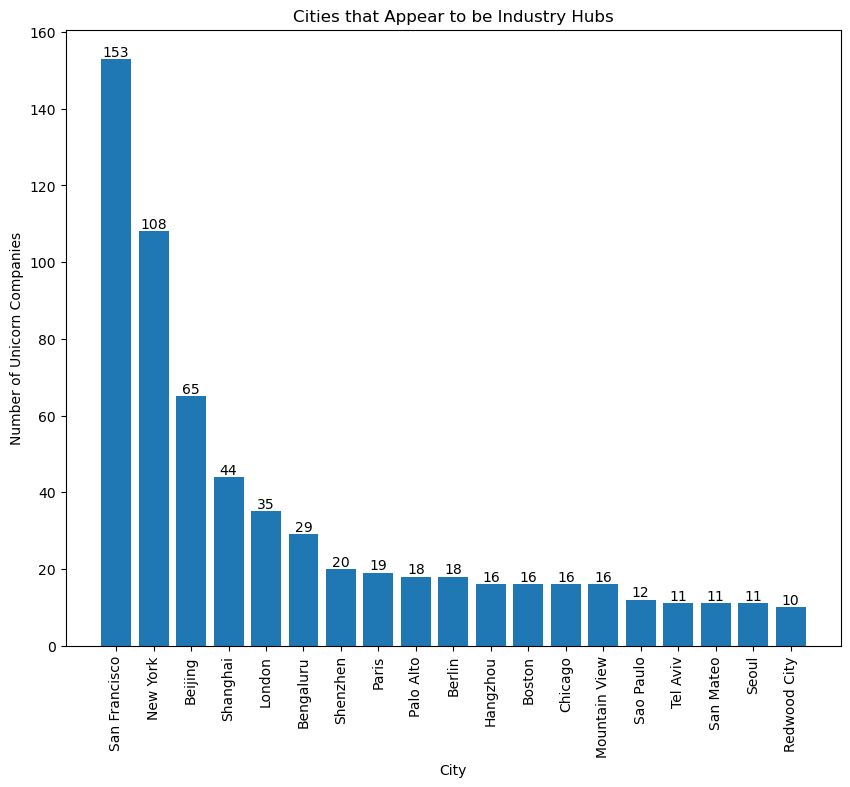

In [28]:
# Plot a bar graph for the cities that appear to be industry hubs
plt.figure(figsize = (10,8))
plt.bar(high_unicorn_cities.index, high_unicorn_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')
plt.title('Cities that Appear to be Industry Hubs')
plt.xticks(rotation=90)
for i, count in enumerate(high_unicorn_cities.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Observation
San Francisco appears to have the highest industry hub with a total of 153

### 4.  Which investors have funded the most unicorns?

In [29]:
investor_counts = df['Select Investors'].value_counts()
investor_counts

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
Advent International                                        2
                                                           ..
Trustbridge Partners, IDG Capital, Sequoia Capital China    1
K2VC, Lightspeed China Partners, Sky9 Capital               1
Automobile Industry Guidance Fund                           1
Trustbridge Partners, Hony Capital, IDG Capital             1
Novator Partners, True, Causeway Media Partners             1
Name: Select Investors, Length: 1058, dtype: int64

In [30]:
 # counts the top 5 investors who have funded the unicorns
investor_counts = df['Select Investors'].value_counts().head(5)
investor_counts

Sequoia Capital                                             3
Pelion Venture Partners, Foundation Capital, Thoma Bravo    2
Insight Partners, Sequoia Capital, Index Ventures           2
Speedinvest, Valar Ventures, Uniqa Ventures                 2
Advent International                                        2
Name: Select Investors, dtype: int64

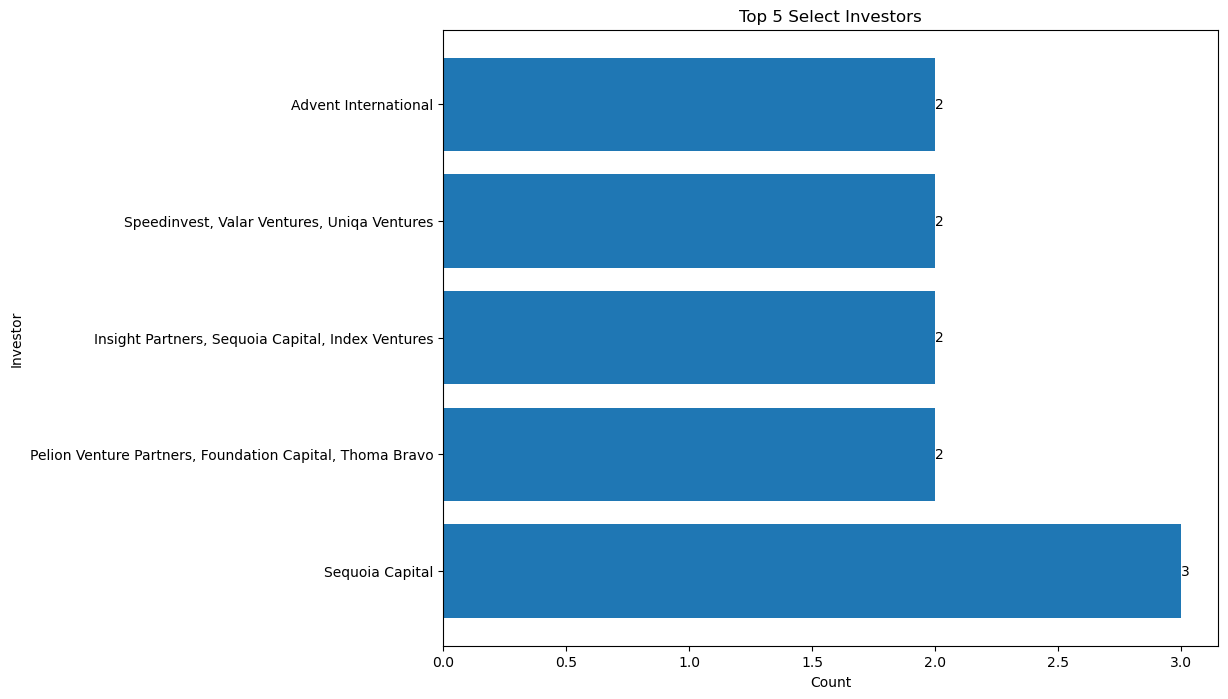

In [31]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a horizontal bar chart
ax.barh(investor_counts.index, investor_counts)

# Set the chart title and axis labels
ax.set_title('Top 5 Select Investors')
ax.set_xlabel('Count')
ax.set_ylabel('Investor')

# Add data labels to the chart
for i, v in enumerate(investor_counts):
    ax.text(v, i, str(v), ha='left', va='center')

# Show the chart
plt.show()


# Observation
Sequioa Capital funded the most unicorns, hence the top investor among others. 

# Univariate Analysis

In [32]:
# Industry count per company
Ind_count = df['Industry'].value_counts().sort_values(ascending = True)
Ind_count

Artificial Intelligence                 11
Travel                                  14
Consumer & retail                       25
Edtech                                  28
Auto & transportation                   31
Hardware                                34
Mobile & telecommunications             38
Data management & analytics             41
Cybersecurity                           50
Supply chain, logistics, & delivery     57
Other                                   58
Artificial intelligence                 73
Health                                  74
E-commerce & direct-to-consumer        111
Internet software & services           205
Fintech                                224
Name: Industry, dtype: int64

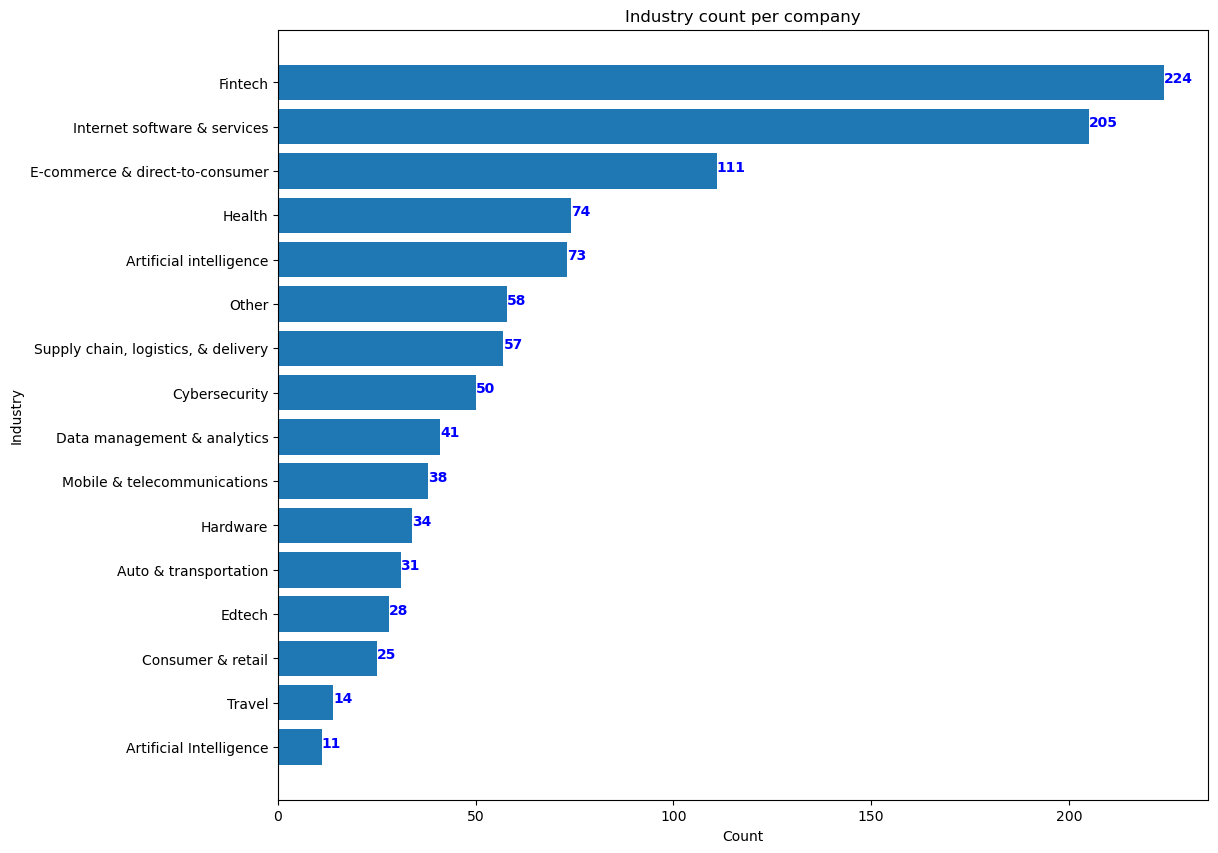

In [33]:
# set the figure size
plt.figure(figsize=(12,10)) 
plt.barh(Ind_count.index, Ind_count.values)
plt.title('Industry count per company')
plt.xlabel('Count')
plt.ylabel('Industry')

# Add data labels to bars
for i, v in enumerate(Ind_count.values):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

plt.show()


# Observation
Fintech has the highest number of industry with a total of 224, whiles Artificial Intelligence has the lowest number of industry with a total of 11.

# Bivariate Analysis

In [34]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Age of Joining', 'ROI', 'Time_to_Unicorn'],
      dtype='object')

In [35]:
# distribution of Industry by Funding
df.groupby('Industry')['Funding'].value_counts().astype('string').sort_values(ascending = True)

Industry                      Funding     
Fintech                       5.460000e+08    1
Health                        5.240000e+08    1
                              5.680000e+08    1
                              5.690000e+08    1
                              5.700000e+08    1
                                             ..
Internet software & services  2.000000e+08    6
Health                        1.000000e+09    6
Auto & transportation         1.000000e+09    7
Internet software & services  1.000000e+09    7
Fintech                       2.000000e+09    8
Name: Funding, Length: 918, dtype: string

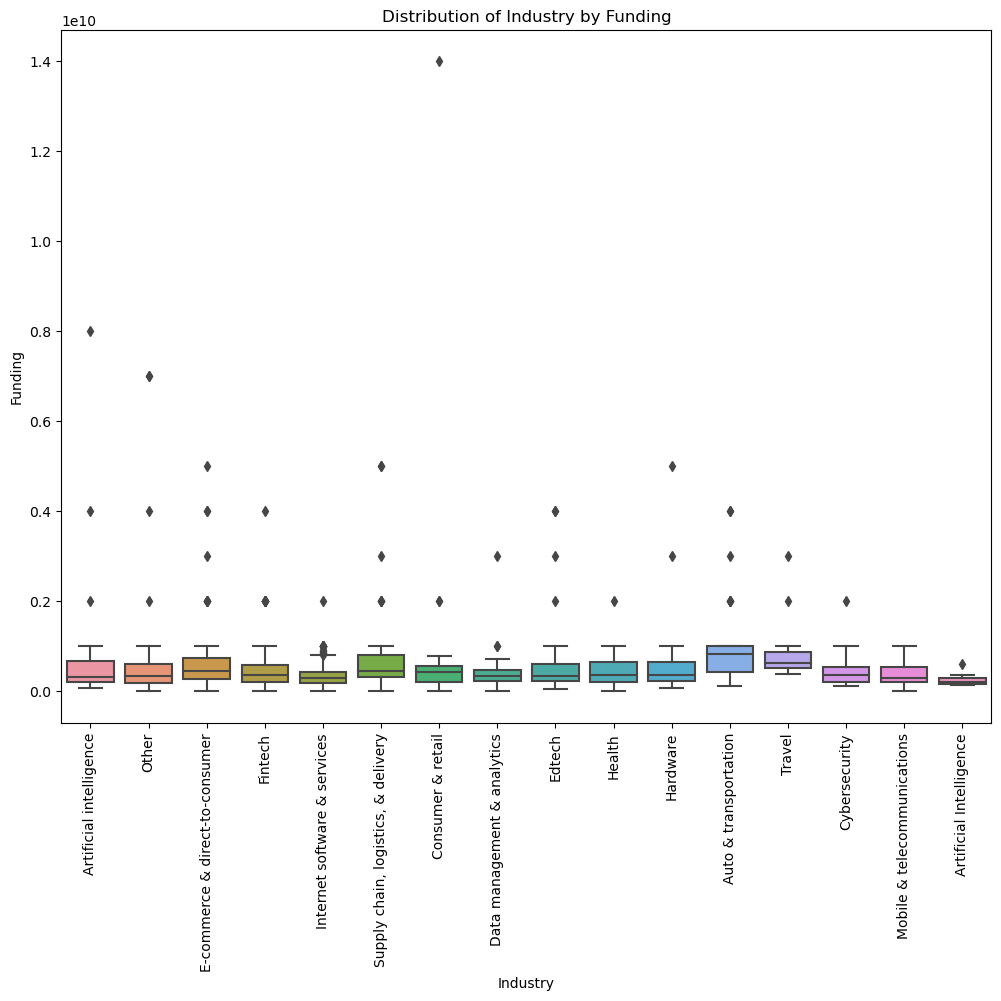

In [36]:
# visualizing of Industry by Funding
plt.figure(figsize = (12,9))
sns.boxplot(x = df['Industry'], y = df['Funding'], data = df)
plt.title('Distribution of Industry by Funding')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

# Observation
Auto & transportation has the highest funding median value of 0.1Billion whiles Artificial Intelligence records the lowest median value

In [37]:
# Calculate the number of investors for each company
df['Investor Count'] = df['Select Investors'].str.split(',').str.len()

# Sort the companies in descending order based on the number of investors
df_sorted = df.sort_values('Investor Count', ascending=False)

# Select the companies with the highest number of investors (e.g., top 5 companies)
top_companies = df_sorted.head(5)

# Perform a bivariate analysis using a cross-tabulation
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Print the cross-tabulation
print(cross_tab)

Company                                             Bytedance  Rappi  SVOLT  \
Select Investors                                                              
Andreessen Horowitz, Andreessen Horowitz, Insti...          0      0      0   
DST Global, Andreessen Horowitz, Sequoia Capita...          0      1      0   
IDG Capital, Bank Of China Group Investment,, S...          0      0      1   
Sequoia Capital China, SIG Asia Investments, Si...          1      0      0   
Sequoia Capital China, Sina Weibo, Kleiner Perk...          0      0      0   

Company                                             Skydio  Yixia  
Select Investors                                                   
Andreessen Horowitz, Andreessen Horowitz, Insti...       1      0  
DST Global, Andreessen Horowitz, Sequoia Capita...       0      0  
IDG Capital, Bank Of China Group Investment,, S...       0      0  
Sequoia Capital China, SIG Asia Investments, Si...       0      0  
Sequoia Capital China, Sina Weibo, Kle

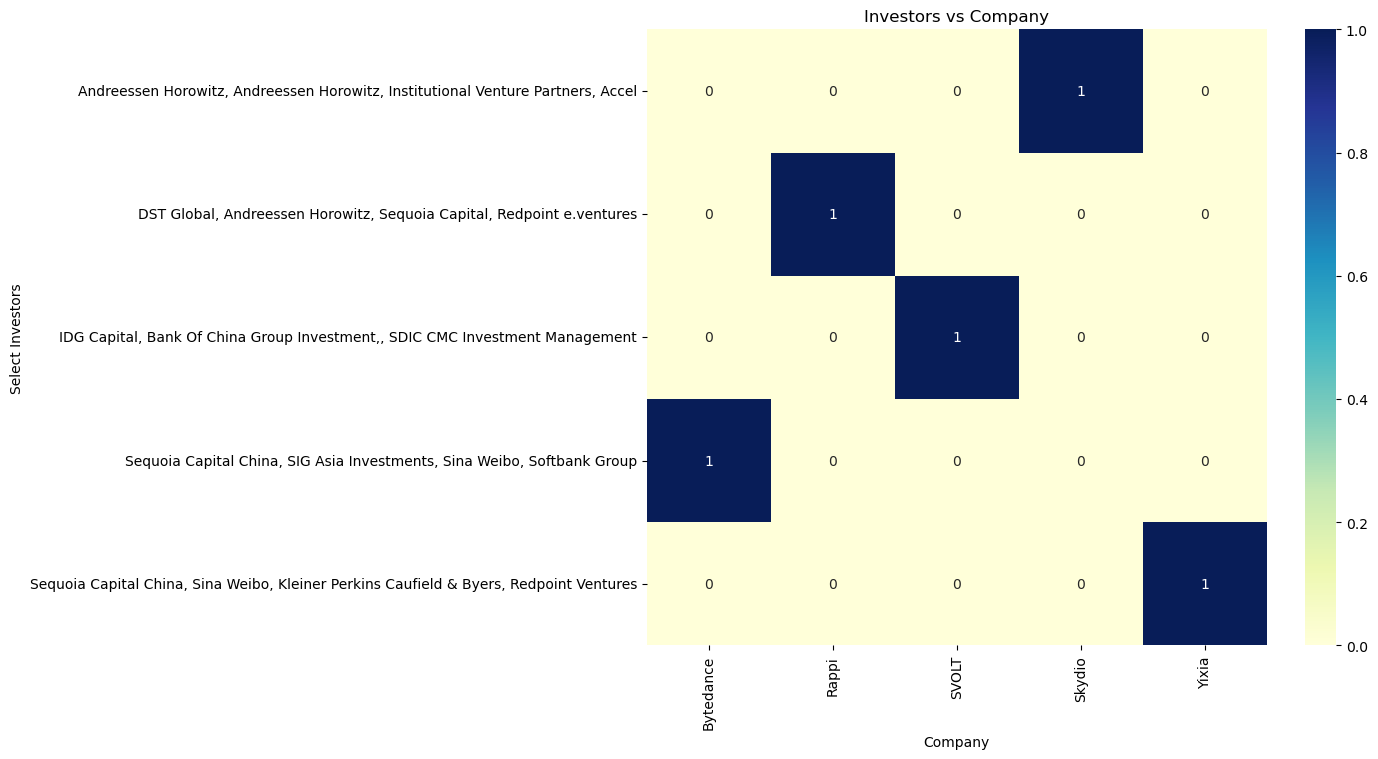

In [38]:
# A cross-tabulation of 'Select Investors' and 'Company' for top companies with the highest Investors
cross_tab = pd.crosstab(top_companies['Select Investors'], top_companies['Company'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Investors vs Company')
plt.xlabel('Company')
plt.ylabel('Select Investors')
plt.xticks(rotation=90)
plt.show()

# Observation 
The chart above shows the relationship between top companies and their investors. A crosstabulation between 'Select Investors' and 'Company' for the top companies with the highest investors. Each cell in the heatmap represents the number of investors for a specific company and investor combination. The color of each cell represents the number of investors, with darker colors indicating a higher number of investors. 


In [39]:
# Top 3 Companies by Valuation
top3_comp = df.groupby('Company')['Valuation'].sum()[:3]
top3_comp

Company
1047 Games    2.000000e+09
1KMXC         1.000000e+09
1Password     7.000000e+09
Name: Valuation, dtype: float64

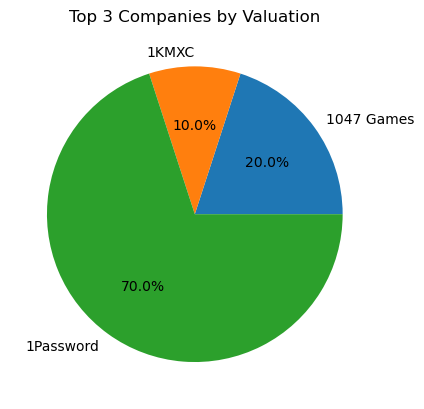

In [40]:
# Create a list of labels for the pie chart
labels = list(top3_comp.index)

# Create a list of values for the pie chart
values = list(top3_comp.values)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title('Top 3 Companies by Valuation')

# Show the pie chart
plt.show()

In [41]:
# Top 3 Companies by Funding
top3_comp = df.groupby('Company')['Funding'].sum()[:3]
top3_comp

Company
1047 Games    127000000.0
1KMXC          86000000.0
1Password     920000000.0
Name: Funding, dtype: float64

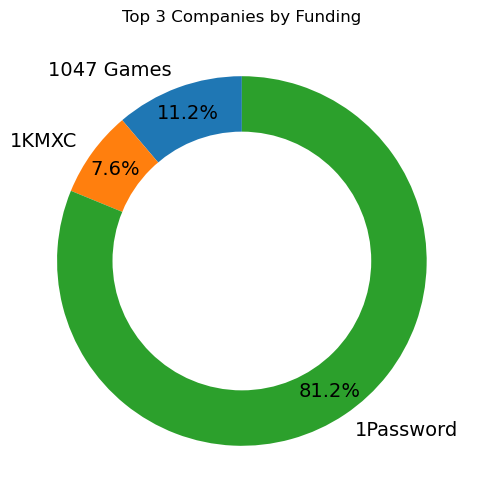

In [42]:

# Create a donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(top3_comp.values, labels=top3_comp.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add title
ax.set_title('Top 3 Companies by Funding')

# Show plot
plt.show()



# Observation
From the donut chart above, 1Password funded the most with an overall of 81.2%.

# Multivariate Analysis

In [43]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining,ROI,Time_to_Unicorn,Investor Count
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,21.500000,-302.0,4
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,13.285714,-45.0,3
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,49.000000,-117.0,3
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,46.500000,-177.0,3
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,10.500000,-62.0,3


In [44]:
# Get the numerical values of the dataset
num_values = df.describe()
num_values

,Valuation,Funding,Age of Joining,ROI,Time_to_Unicorn,Investor Count
count,1.074000e+03,1.074000e+03,1074.000000,1074.000000,1074.000000,1074.000000
mean,3.455307e+09,5.510428e+08,7.489851,inf,40.573557,2.843575
std,8.547022e+09,8.077194e+08,5.316578,NaN,416.033046,0.484350
min,1.000000e+09,0.000000e+00,-3.200000,-0.500000,-936.000000,1.000000
25%,1.000000e+09,2.180000e+08,4.425000,2.497378,-250.500000,3.000000
50%,2.000000e+09,3.650000e+08,6.500000,4.263158,29.500000,3.000000
75%,3.000000e+09,6.030000e+08,9.100000,7.376120,336.750000,3.000000
max,1.800000e+11,1.400000e+10,98.500000,inf,1054.000000,4.000000


<Figure size 1200x800 with 0 Axes>

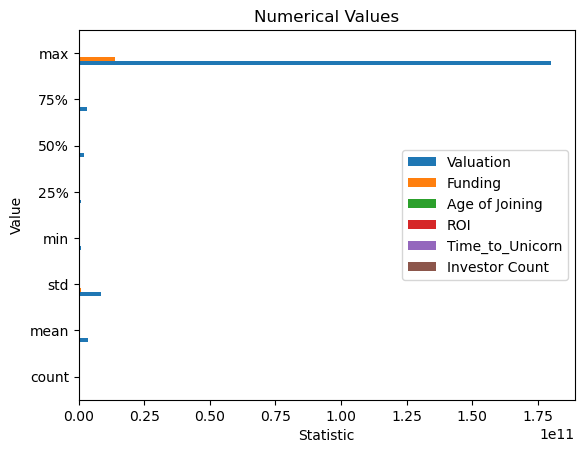

In [57]:
# Create a bar plot
plt.figure(figsize=(12, 8))
num_values.plot(kind='barh')
plt.title('Numerical Values')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()


# Observation


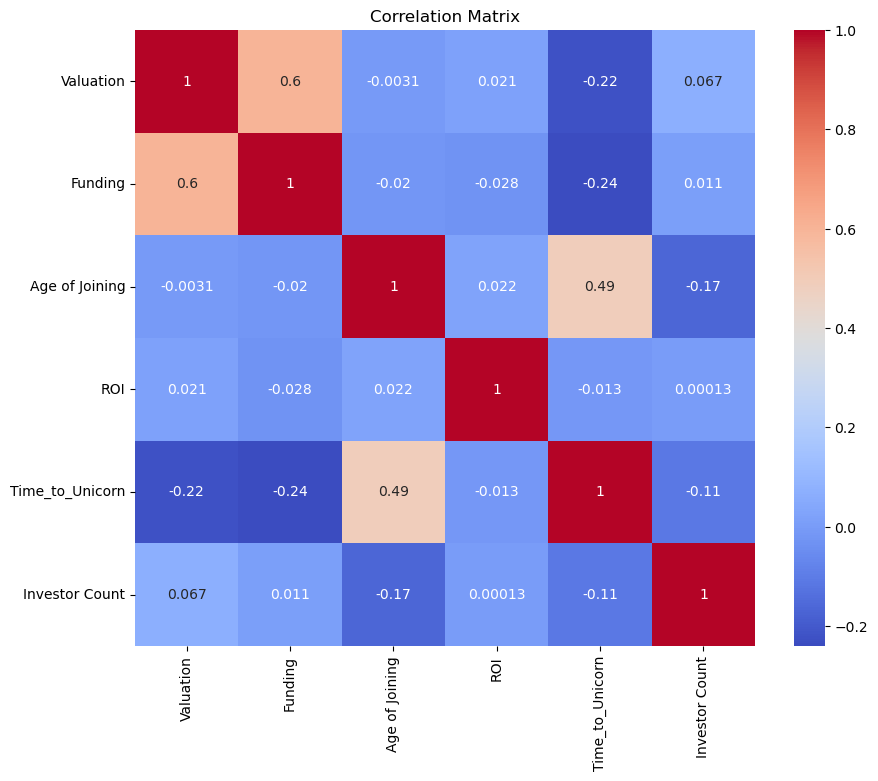

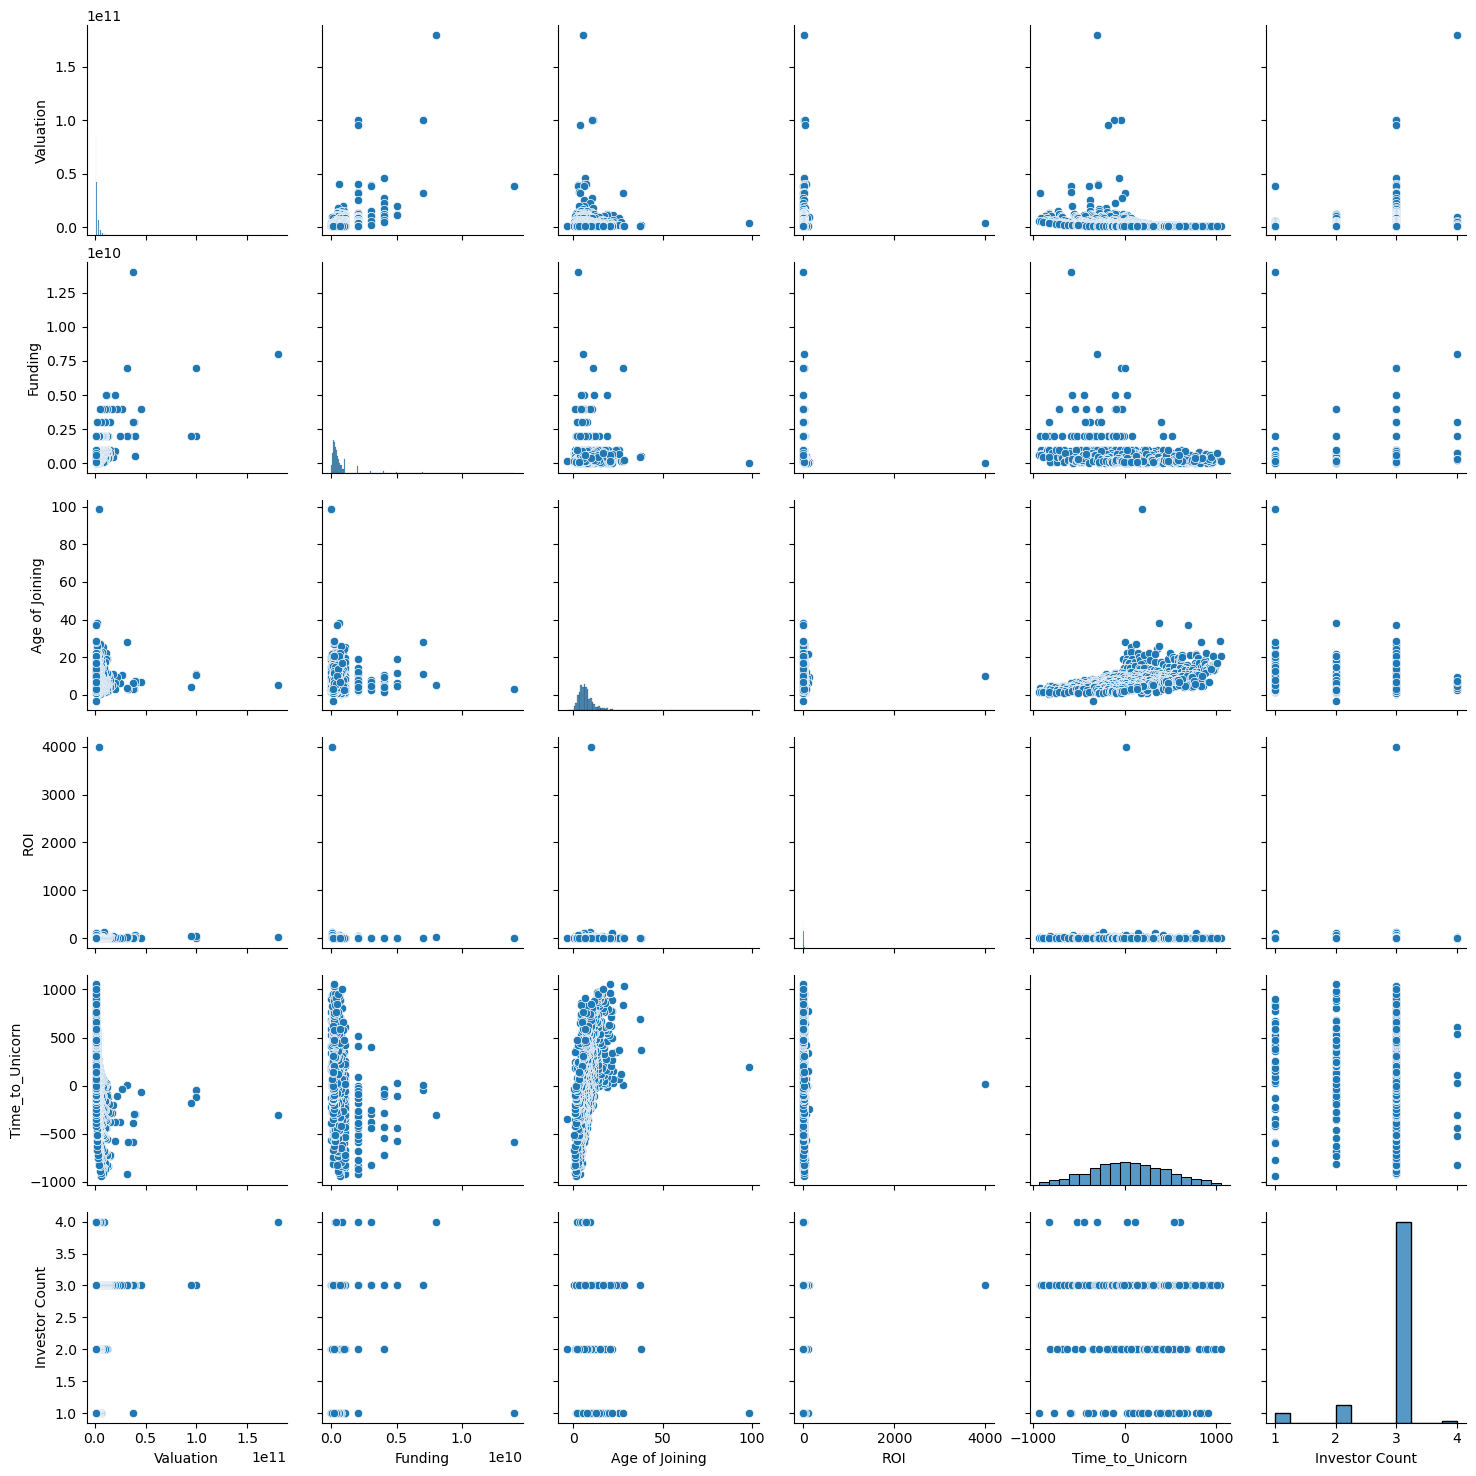

In [59]:
# Calculate the correlation matrix
numeric_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Create scatter plots to visualize the relationships between variables
sns.pairplot(df)
plt.show()

# Observation 
The heatmap of the correlation matrix above illustrates the relationships between multiple variables in the dataset. The color of each cell reflects the strength and direction of the correlation, with darker colors (i.e., red and 1) indicating stronger correlations, and lighter colors (i.e., light blue, 0.067 for investor count and Valuation) indicating weaker or no correlations. The numbers within each cell represent the corresponding correlation coefficient value.

# Overall Recommendation

Focus on sustainable growth: While rapid growth is often a hallmark of unicorn companies, it's important to ensure that the growth is sustainable over the long term. This means focusing on building a solid business model, managing cash flow effectively, and investing in the right areas to support future growth.

Build a strong team: A company is only as strong as its team. Unicorn companies should focus on hiring and retaining top talent, and creating a positive and inclusive company culture that fosters innovation, collaboration, and growth.

Innovate and differentiate: The most successful unicorn companies are often those that have disrupted an established industry or created a new market altogether. To continue to succeed, unicorn companies should focus on innovation and differentiation, and staying ahead of the competition.

Leverage technology: Technology is often a key enabler of growth and innovation for unicorn companies. By leveraging cutting-edge technologies like AI, machine learning, and data analytics, unicorn companies can gain a competitive advantage and improve operational efficiency.

Stay agile: In today's fast-paced business environment, it's important for unicorn companies to stay agile and adaptable. This means being open to change, embracing new ideas and technologies, and being willing to pivot quickly if necessary.

